In [1]:
from data_loader import read_data_file, draw_polygons
from polygon_manipulator import add_hinges, find_outer_countour
from gcode_operation import generate_gcode

layer_height = 0.4
line_width = 0.4


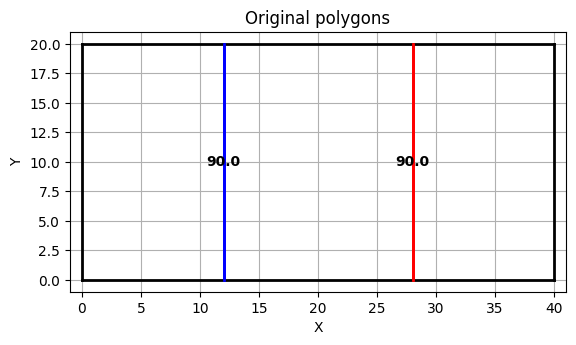

[[[[0.0, 0.0], [12.0, 0.0], [12.0, 20.0], [0.0, 20.0]], [[2.0, 1.0, 90.0]], []], [[[12.0, 0.0], [28.0, 0.0], [28.0, 20.0], [12.0, 20.0]], [[2.0, 0.0, 90.0], [4.0, 1.0, 90.0]], [1.0, 2.0]], [[[28.0, 0.0], [40.0, 0.0], [40.0, 20.0], [28.0, 20.0]], [[4.0, 0.0, 90.0]], []]]
[[[0, 1], -10.444150064008822, [1, 2], [-10.444150064008822, 0.0]], [[1, 2], 10.444150064008822, [2], [-10.444150064008822, 0.0]]]
pm:  [[[[0.0, 0.0], [12.0, 0.0], [12.0, 20.0], [0.0, 20.0]], [[2.0, 1.0, 90.0]], []], [[[22.444150064008824, 0.0], [38.444150064008824, 0.0], [38.444150064008824, 20.0], [22.444150064008824, 20.0]], [[2.0, 0.0, 90.0], [4.0, 1.0, 90.0]], [1.0, 2.0]], [[[48.88830012801765, 0.0], [60.88830012801765, 0.0], [60.88830012801765, 20.0], [48.88830012801765, 20.0]], [[4.0, 0.0, 90.0]], []]]
pf:  [[[[0.0, 0.0], [12.0, 0.0], [16.82207503200441, 0.0], [16.82207503200441, 20.0], [12.0, 20.0], [0.0, 20.0]], [[3, 1.0, 90.0]], []], [[[22.444150064008824, 0.0], [38.444150064008824, 0.0], [43.26622509601324, 0

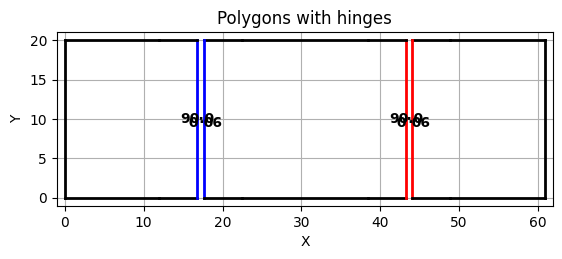

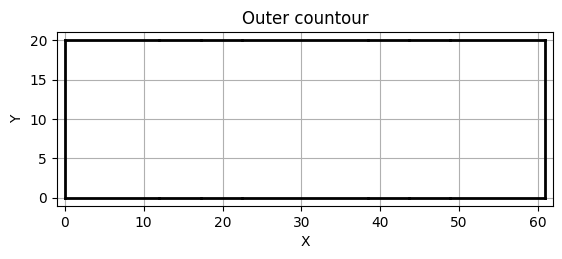

[[[[0.0, 0.0], [12.0, 0.0], [16.82207503200441, 0.0], [16.82207503200441, 20.0], [12.0, 20.0], [0.0, 20.0]], [[3, 1.0, 90.0]], []], [[[22.444150064008824, 0.0], [38.444150064008824, 0.0], [43.26622509601324, 0.0], [43.26622509601324, 20.0], [38.444150064008824, 20.0], [22.444150064008824, 20.0], [17.622075032004414, 20.0], [17.622075032004414, 0.0]], [[3, 0.0, 90.0], [7, 1.0, 90.0]], [1.0, 2.0]], [[[48.88830012801765, 0.0], [60.88830012801765, 0.0], [60.88830012801765, 20.0], [48.88830012801765, 20.0], [44.066225096013234, 20.0], [44.066225096013234, 0.0]], [[5, 0.0, 90.0]], []]]
[[[[0.0, 0.0], [12.0, 0.0], [12.0, 20.0], [0.0, 20.0]], [[2.0, 1.0, 90.0]], []], [[[12.0, 0.0], [28.0, 0.0], [28.0, 20.0], [12.0, 20.0]], [[2.0, 0.0, 90.0], [4.0, 1.0, 90.0]], [1.0, 2.0]], [[[28.0, 0.0], [40.0, 0.0], [40.0, 20.0], [28.0, 20.0]], [[4.0, 0.0, 90.0]], []]]
[[48.88830012801765, 0.0], [60.88830012801765, 0.0], [60.88830012801765, 20.0], [48.88830012801765, 20.0], [43.666225096013235, 20.0], [38.444

In [203]:
folder_name = 'data_files/'
# filename = 'single_45'
# filename = 'single_45_mountain'
# filename = 'single_90'
# filename = 'single_180'
filename = 'zig-zag'
# filename = 'cube'
# filename = 'bird'
# filename = 'test'

polygons = read_data_file(folder_name + filename + '.dat')
draw_polygons(polygons, plot_title='Original polygons')

polygons_final = add_hinges(polygons)
draw_polygons(polygons_final, plot_title='Polygons with hinges')

outer_countour = find_outer_countour(polygons)
draw_polygons([[outer_countour, []]], plot_title='Outer countour')

# middle_polygons = find_middle_polygons(polygons)

print(polygons_final)
print(polygons)
print(outer_countour)

# mid_layers = find_mid_layers(polygons_final)

generate_gcode(f'gcode/{filename}_bottom.gcode', filename, polygons_final, outer_countour, 'bottom', layer_height, line_width)
generate_gcode(f'gcode/{filename}_top.gcode', filename, polygons_final, outer_countour, 'top', layer_height, line_width)

In [204]:
import numpy as np
def simplify_polygons(polygon, tolerance=1e-4):
    """
    简化多边形，移除共线点。  循环检查，确保首尾顶点也被正确处理

    Args:
        polygon: 多边形顶点坐标的numpy数组，形状为 (n, 2)。
        tolerance: 用于判断三个点是否共线的容差值。

    Returns:
        简化后的多边形顶点坐标的numpy数组。
    """

    polygon = np.array(polygon)
    if len(polygon) <= 2:
        return polygon

    simplified_polygon = []
    n = len(polygon)
    removed_points = []

    for i in range(n):
        # 获取前一个、当前和后一个顶点。使用模运算符实现循环
        p1 = polygon[(i - 1) % n]
        p2 = polygon[i]
        p3 = polygon[(i + 1) % n]

        # 计算向量 p1p2 和 p2p3
        v1 = p2 - p1
        v2 = p3 - p2
        
        if np.linalg.norm(v1) < 1e-6:
            # 如果向量长度接近于0，则跳过当前点
            removed_points.append(i)
        
        else:
            jiter = 0
            while np.linalg.norm(v2) < 1e-6:
                v2 = polygon[(i + 2 + jiter) % n] - p2
                jiter += 1
    
            # 计算叉积的绝对值。如果叉积接近于0，则表示三个点共线
            cross_product = np.abs(np.cross(v1, v2))
            
            # print(f"p1: {p1}, p2: {p2}, p3: {p3}, cross_product: {cross_product}")

            # 如果叉积大于容差值，或者 simplified_polygon 为空（表示第一个点），则保留当前点
            if cross_product > tolerance:
                # print(f"Adding point: {p2}")
                simplified_polygon.append(p2)
            else:
                removed_points.append(i)

    return np.array(simplified_polygon), removed_points


def find_polygon_centroid(polygon):
    """
    计算多边形的中心点坐标。

    Args:
        polygon: 多边形顶点坐标的numpy数组，形状为 (n, 2)。

    Returns:
        中心点坐标的numpy数组，形状为 (2,)。
    """

    polygon = np.array(polygon)
    n = len(polygon)

    # 如果多边形只有一个点，则中心点就是该点
    if n == 1:
        return polygon[0]

    # 如果多边形只有两个点，则中心点是这两个点的中点
    if n == 2:
        return (polygon[0] + polygon[1]) / 2

    # 使用公式计算多边形面积和中心点坐标
    area = 0.0
    centroid_x = 0.0
    centroid_y = 0.0

    for i in range(n):
        j = (i + 1) % n  # 下一个顶点
        xi, yi = polygon[i]
        xj, yj = polygon[j]
        term = (xi * yj - xj * yi)
        area += term
        centroid_x += (xi + xj) * term
        centroid_y += (yi + yj) * term

    area *= 0.5
    centroid_x /= (6 * area)
    centroid_y /= (6 * area)

    return np.array([centroid_x, centroid_y])


def min_angle_between_vectors(side_vectors):
    """
    找到一系列向量中，两两之间最小的夹角。

    Args:
        side_vectors: 向量的numpy数组，形状为 (n, 2)。

    Returns:
        两两向量之间最小的夹角 (弧度制)。返回None，如果向量数量小于2
    """

    if len(side_vectors) < 2:
        return None

    min_angle = np.inf  # 初始化为无穷大

    for i in range(len(side_vectors)):
        for j in range(i + 1, len(side_vectors)):  # 避免重复计算和与自身计算
            v1 = side_vectors[i]
            v2 = side_vectors[j]

            # 计算余弦值
            cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

            # 确保余弦值在 [-1, 1] 范围内，防止浮点数精度问题
            cos_angle = np.clip(cos_angle, -1.0, 1.0)

            # 计算弧度
            angle = np.arccos(cos_angle)

            # 更新最小角度
            min_angle = min(min_angle, angle)

    return min_angle

In [205]:
polygons_simple = []
for i in range(len(polygons_final)):
    polygons_simple.append([])
    # if i == 1:
    for j in range (len(polygons_final[i])):
        if j == 0:
            sp, rp = simplify_polygons(polygons_final[i][j])
            polygons_simple[i].append(sp)
        elif j == 1:
            polygons_simple[i].append(polygons_final[i][j])
            for side in polygons_simple[i][j]:
                side_index = side[0]
                count = 0
                for k in range (len(rp)):
                    if side_index-1 >= rp[k]:
                        count += 1
                side[0] -= count
        else:
            polygons_simple[i].append(polygons_final[i][j])

In [206]:
polygons_simple

[[array([[ 0.        ,  0.        ],
         [16.82207503,  0.        ],
         [16.82207503, 20.        ],
         [ 0.        , 20.        ]]),
  [[2, 1.0, 90.0]],
  []],
 [array([[43.2662251 ,  0.        ],
         [43.2662251 , 20.        ],
         [17.62207503, 20.        ],
         [17.62207503,  0.        ]]),
  [[1, 0.0, 90.0], [3, 1.0, 90.0]],
  [1.0, 2.0]],
 [array([[60.88830013,  0.        ],
         [60.88830013, 20.        ],
         [44.0662251 , 20.        ],
         [44.0662251 ,  0.        ]]),
  [[3, 0.0, 90.0]],
  []]]

In [ ]:
width_channel = 3

middle_polygons = []

for i in range(len(polygons_simple)):
# for i in range (3,4):
    polygon = polygons_simple[i][0]
    hinges = polygons_simple[i][1]
    connected_hinges = polygons_simple[i][2]
    
    if len(connected_hinges) > 0:
        centroid = find_polygon_centroid(polygon)
        side_vectors = []
        
        for hinge in connected_hinges:
            hinge_index = int(hinges[int(hinge)-1][0])
            p1 = polygon[int(hinge_index-1)]
            p2 = polygon[int(hinge_index)]
            v = np.array([p2[1] - p1[1], -p2[0] + p1[0]])
            v = v / np.linalg.norm(v)
            side_vectors.append(v)       
            # print(v, p1, p2) 
        
        min_angle = np.min([min_angle_between_vectors(side_vectors),np.pi*2/3])
        move_distance = width_channel / 2 / np.tan(min_angle / 2)
        
        p_list = []
        for vector in side_vectors:
            vector_1 = vector * move_distance
            vector_2 = np.array([-vector[1], vector[0]]) * width_channel / 2
            p1 = centroid + vector_1 - vector_2
            p2 = centroid + vector_1 + vector_2
            
            # if len(p_list) == 0:
            p_list.append(p1.tolist())
            p_list.append(p2.tolist())
            # else:
            #     if np.linalg.norm(p_list[-1][0] - p1) > 1e-4:
            #         p_list.append(p1.tolist())
            #     if np.linalg.norm(p_list[0][0] - p2) > 1e-4:
            #         p_list.append(p2.tolist())
                
        # print("polygon: \n", polygon)
        # print("hinge:   \n", hinges)
        # print("ch:      \n", connected_hinges)
        # print("pl:      \n", np.array(p_list))
        
        polygon_to_connect = []
        for p in polygon:
            polygon_to_connect.append(p.tolist())
        
        p_side = [i+1 for i in range (len(polygon))]
            
        n = len(connected_hinges)
        for i in range(n):
            ch_index = hinges[int(connected_hinges[n-i-1])-1][0]
            p1 = np.array(polygon_to_connect[ch_index-1])
            p2 = np.array(polygon_to_connect[ch_index])
            v = p2 - p1
            l = np.linalg.norm(v)
            v = v / np.linalg.norm(v)
            polygon_to_connect = polygon_to_connect[:ch_index] + [((p1+p2)/2-v*width_channel/2).tolist(), ((p1+p2)/2+v*width_channel/2).tolist()] + polygon_to_connect[ch_index:]
            p_side = p_side[:ch_index] + [ch_index, ch_index] + p_side[ch_index:]
        
        chs_index = []
        for i in range (n):
            ch_index = hinges[int(connected_hinges[i])-1][0]
            chs_index.append(ch_index)
        
        # print("ptc:     \n", np.array(polygon_to_connect))
        # print("ps:      \n", np.array(p_side))
        # print("chs :   \n", np.array(chs_index))
        
        polygons_mid_layer = []
        j1 = 0
        hl_origin = [hinge[0] for hinge in hinges]
        # print("hl_origin: ", hl_origin)
        for i in range (len(connected_hinges)):
            j10 = j1
            pm = []
            hl = []
            itr_hinge = 0
            itr = 0
            while (itr < chs_index[i]):
                pm.append(polygon_to_connect[j1])
                itr_hinge += 1
                if p_side[j1] in hl_origin:
                    idx = int(hl_origin.index(p_side[j1]))
                    hl.append([itr_hinge, hinges[idx][1], hinges[idx][2]])
                    # print('111', hl[-1])
                itr = p_side[j1]
                j1 += 1
            # pm.append(polygon_to_connect[j1]+[1])
            # j1 += 1
            pm.append(polygon_to_connect[j1])
            itr_hinge += 1
            # if p_side[j1] in hl_origin:
            #     idx = int(hl_origin.index(p_side[j1]))
            #     hl.append([itr_hinge, hinges[idx][1], hinges[idx][2]])
            #     print('222', hl[-1])
            j1 += 1 + chs_index[(i+1)%len(chs_index)] - chs_index[i]
            pm.append(p_list[i*2])
            itr_hinge += 1
            pm.append(p_list[i*2-1])
            itr_hinge += 1
            
            j2 = 0
            itr = p_side[j2]
            j2 += 1
            while(itr < chs_index[i-1]):
                itr = p_side[j2]
                j2 += 1
            j2 += 1
            # print(j2)
            while(j2%len(polygon_to_connect) != j10):
                pm.append(polygon_to_connect[j2])
                itr_hinge += 1
                if p_side[j2] in hl_origin:
                    idx = int(hl_origin.index(p_side[j2]))
                    hl.append([itr_hinge, hinges[idx][1], hinges[idx][2]])
                    # print('333', hl[-1])
                j2 += 1
            polygons_mid_layer.append([pm,hl])
            # polygons_mid_layer.append(np.array(simplify_polygons(pm)[0]))
        # print("pml:     \n", polygons_mid_layer)
        
        middle_polygons.append(polygons_mid_layer)
    
    else:
        middle_polygons.append([[polygon.tolist(), hinges]])

hl_origin:  [1, 3]


In [219]:
middle_polygons

[[[[[0.0, 0.0],
    [16.82207503200441, 0.0],
    [16.82207503200441, 20.0],
    [0.0, 20.0]],
   [[2, 1.0, 90.0]]]],
 [[[[43.26622509601324, 0.0],
    [43.26622509601324, 8.5],
    [31.310175467793258, 8.499999999999996],
    [29.578124660224383, 8.499999999999996],
    [17.622075032004414, 8.5],
    [17.622075032004414, 0.0]],
   [[1, 0.0, 90.0], [5, 1.0, 90.0]]],
  [[[17.622075032004414, 20.0],
    [17.622075032004414, 11.5],
    [29.578124660224383, 11.499999999999996],
    [31.310175467793258, 11.499999999999996],
    [43.26622509601324, 11.5],
    [43.26622509601324, 20.0]],
   [[1, 1.0, 90.0], [5, 0.0, 90.0]]]],
 [[[[60.88830012801765, 0.0],
    [60.88830012801765, 20.0],
    [44.066225096013234, 20.0],
    [44.066225096013234, 0.0]],
   [[3, 0.0, 90.0]]]]]

In [175]:
lll = [1,2,3]

In [ ]:
[[[[0.0, 0.0],
   [16.82207503200441, 0.0],
   [16.82207503200441, 20.0],
   [0.0, 20.0]],
  [[2, 1.0, 90.0]]],
 [[[[43.26622509601324, 0.0],
    [43.26622509601324, 8.5],
    [31.310175467793258, 8.499999999999996],
    [29.578124660224383, 8.499999999999996],
    [17.622075032004414, 8.5],
    [17.622075032004414, 0.0]],
   [[1, 0.0, 90.0], [5, 1.0, 90.0]]],
  [[[17.622075032004414, 20.0],
    [17.622075032004414, 11.5],
    [29.578124660224383, 11.499999999999996],
    [31.310175467793258, 11.499999999999996],
    [43.26622509601324, 11.5],
    [43.26622509601324, 20.0]],
   [[1, 1.0, 90.0], [5, 0.0, 90.0]]]],
 [[[60.88830012801765, 0.0],
   [60.88830012801765, 20.0],
   [44.066225096013234, 20.0],
   [44.066225096013234, 0.0]],
  [[3, 0.0, 90.0]]]]

In [ ]:
[[array([[43.2662251 ,  0.        ],
          [43.2662251 ,  8.5       ],
          [31.31017547,  8.5       ],
          [29.57812466,  8.5       ],
          [17.62207503,  8.5       ],
          [17.62207503,  0.        ]]),
   [[1, 0.0, 90.0], [5, 1.0, 90.0]]],
  [array([[17.62207503, 20.        ],
          [17.62207503, 11.5       ],
          [29.57812466, 11.5       ],
          [31.31017547, 11.5       ],
          [43.2662251 , 11.5       ],
          [43.2662251 , 20.        ]]),
   [[1, 1.0, 90.0], [5, 0.0, 90.0]]]]